<a href="https://colab.research.google.com/github/sunezr/eat-tf2-30days-learning/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-1 结构化数据建模流程范例

In [45]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
%matplotlib inline
tf.__version__

'2.2.0-rc2'

In [0]:
dftrain_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/eat/data/titanic/train.csv')
dftest_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/eat/data/titanic/test.csv')

In [47]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


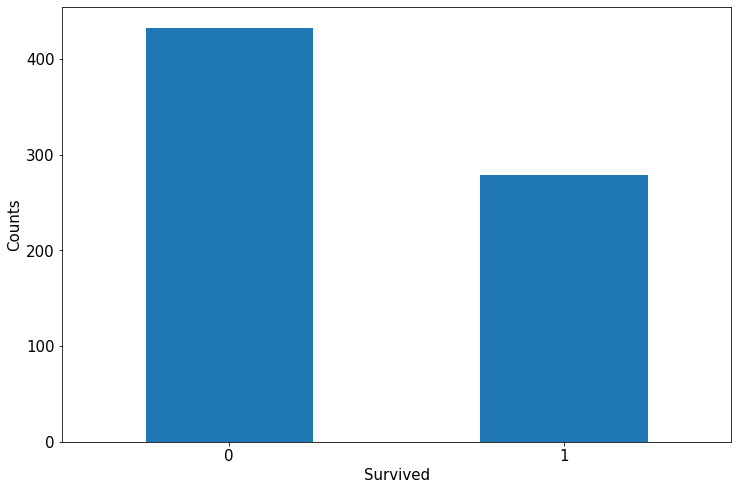

In [48]:
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar',
    figsize = (12, 8), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()

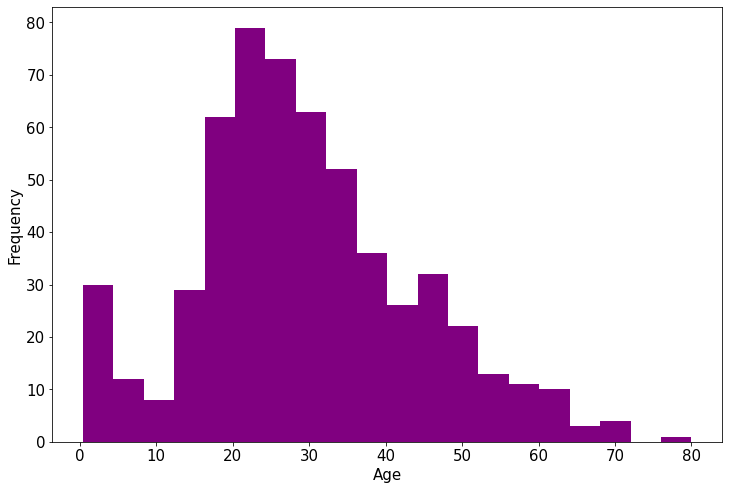

In [49]:
ax = dftrain_raw['Age'].plot(kind='hist', bins=20, color='purple',
                            figsize=(12, 8), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

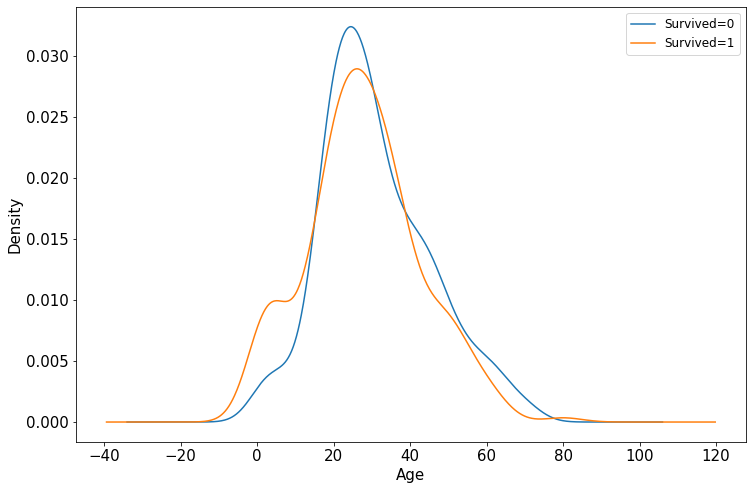

In [50]:
ax = dftrain_raw.query('Survived==0')['Age'].plot(kind='density',
                        figsize=(12, 8), fontsize=15)
dftrain_raw['Age'][dftrain_raw['Survived']==1].plot(kind='density')
ax.legend(['Survived=0', 'Survived=1'], fontsize=12)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

In [51]:
dftrain_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
def preprocessing(df):
    df_droped = df.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
    dfresult = pd.get_dummies(df_droped, 
            columns=['Pclass', 'Sex', 'Age', 'SibSp',  'Parch', 'Embarked'], dummy_na=True)
    return dfresult
#preprocessing(dftrain_raw)

In [0]:
X_data = pd.concat([dftrain_raw, dftest_raw])
X_data_dummy = preprocessing(X_data)

In [0]:
X_train = X_data_dummy.iloc[: dftrain_raw.shape[0], :]
y_train = dftrain_raw['Survived']

X_test = X_data_dummy.iloc[dftrain_raw.shape[0]: , :]
y_test = dftest_raw['Survived']

In [80]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(117,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                5900      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 6,421
Trainable params: 6,421
Non-trainable params: 0
_________________________________________________________________


### Train model

In [81]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2)

Epoch 1/30
9/9 [==============================] - 0s 24ms/step - loss: 0.9436 - auc: 0.6570 - val_loss: 0.7453 - val_auc: 0.5594
Epoch 2/30
9/9 [==============================] - 0s 7ms/step - loss: 0.7030 - auc: 0.5055 - val_loss: 0.6927 - val_auc: 0.4604
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6895 - auc: 0.5379 - val_loss: 0.6857 - val_auc: 0.6326
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6796 - auc: 0.6186 - val_loss: 0.6730 - val_auc: 0.7106
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6709 - auc: 0.7189 - val_loss: 0.6659 - val_auc: 0.7254
Epoch 6/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6606 - auc: 0.7523 - val_loss: 0.6569 - val_auc: 0.7439
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - auc: 0.7766 - val_loss: 0.6472 - val_auc: 0.7546
Epoch 8/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6380 - auc: 0.7834 - val_loss: 

In [0]:
#%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
  train_metric = history.history[metric]
  val_metric = history.history['val_' + metric]
  epochs = range(1, len(train_metric) + 1)
  plt.plot(epochs, train_metric, 'bo--')
  plt.plot(epochs, val_metric, 'ro--')
  plt.title('Training and validation' + metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend(["train" + metric, "val" + metric])


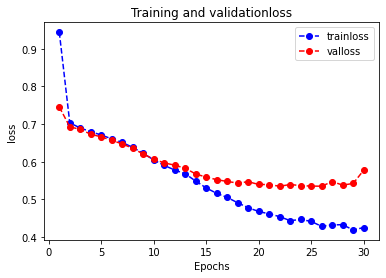

In [83]:
plot_metric(history, 'loss')

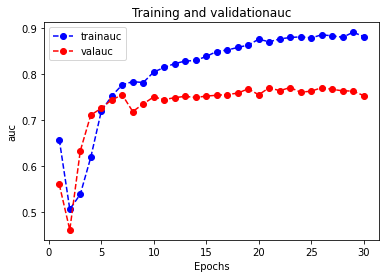

In [84]:
plot_metric(history, 'auc')

type(history.history)

In [86]:
model.evaluate(x=X_test, y=y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4553 - auc: 0.8568


[0.45534488558769226, 0.8568007946014404]

In [88]:
model.predict(X_test[0:10])
#model(tf.constant(x_test[0:10].values,dtype = tf.float32)) #等价写法

array([[0.3814661 ],
       [0.4412765 ],
       [0.42228764],
       [0.59184   ],
       [0.75846124],
       [0.5740886 ],
       [0.0924699 ],
       [0.8662943 ],
       [0.17818196],
       [0.08902571]], dtype=float32)

In [90]:
model.predict_classes(X_test[0:10])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [0]:
# save model
model.save('/content/drive/My Drive/Colab Notebooks/eat/keras_model.h5')  

In [0]:
del model

In [97]:
model = models.load_model('/content/drive/My Drive/Colab Notebooks/eat/keras_model.h5')  

In [109]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4553 - auc: 0.8568


[0.45534488558769226, 0.8568007946014404]

In [0]:
json_str = model.to_json()
model.save_weights('/content/drive/My Drive/Colab Notebooks/eat/keras_model_weight.h5')

In [0]:
model_json = models.model_from_json(json_str)

In [0]:
model_json.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC'])

In [113]:
model_json.load_weights('/content/drive/My Drive/Colab Notebooks/eat/keras_model_weight.h5')
model_json.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4553 - auc: 0.8568


[0.45534488558769226, 0.8568007946014404]

### save with tf

In [0]:
#保存权重，该方式仅仅保存权重张量
model.save_weights('./content/drive/My Drive/Colab Notebooks/eat/tf_model_weight.ckpt', save_format='tf')

In [117]:
# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署
model.save('/content/drive/My Drive/Colab Notebooks/eat/tf_model_savedmodel', save_format="tf")
model_loaded = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/eat/tf_model_savedmodel')
model_loaded.evaluate(X_test, y_test)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/eat/tf_model_savedmodel/assets
6/6 [==============================] - 0s 2ms/step - loss: 0.4553 - auc: 0.8568


[0.45534488558769226, 0.8568007946014404]